# Phase estimation simulation

In [1]:
import numpy as np
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
import circuit_sim as cs

In [2]:
np.random.seed(142)

## Dependency on t

In [3]:
# to-be estimated phase
ϕ = 0.65

In [4]:
n = 4
# random base change matrix
Q = unitary_group.rvs(2**n)
# phases stored in `U`
λ = np.array(np.insert(np.random.uniform(0, 1, 2**n - 1), 0, ϕ))
U = Q @ np.diag(np.exp(2*np.pi*1j * λ)) @ Q.conj().T
# eigenstate of U (input to phase estimation algorithm)
v = Q[:, 0]
# check: v is indeed an eigenvector of `U`
np.allclose(U @ v, np.exp(2*np.pi*1j * ϕ) * v)

True

In [5]:
# simulate phase estimation algorithm
tlist = [3, 4, 5]
ψphase = [cs.phase_estimation_circuit(v, U, t, n) for t in tlist]

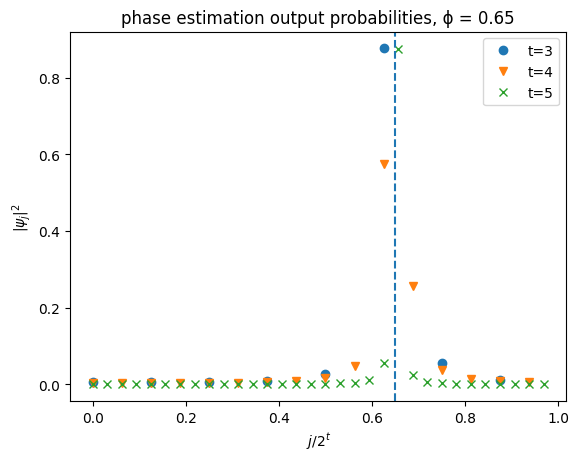

In [6]:
# visualize output
fmts = ['o', 'v', 'x']
for j, t in enumerate(tlist):
    plt.plot(np.arange(2**t)/2**t, abs(ψphase[j])**2, fmts[j], label=f"t={t}")
plt.axvline(ϕ, linestyle="--")
plt.xlabel(r"$j / 2^t$")
plt.ylabel(r"$|\psi_{j}|^2$")
plt.title(f"phase estimation output probabilities, ϕ = {ϕ}")
plt.legend()
plt.show()

## Effect of using a superposition of eigenvector of `U` as initial state

In [7]:
# use a linear combination of eigenvectors of `U` as initial state
w = Q[:, 0]/np.sqrt(2) + 0.5*Q[:, 1] + 0.5*Q[:, 2]
# should be normalized
np.linalg.norm(w)

0.9999999999999998

In [8]:
t = 5
ψphase2 = cs.phase_estimation_circuit(w, U, t, n)

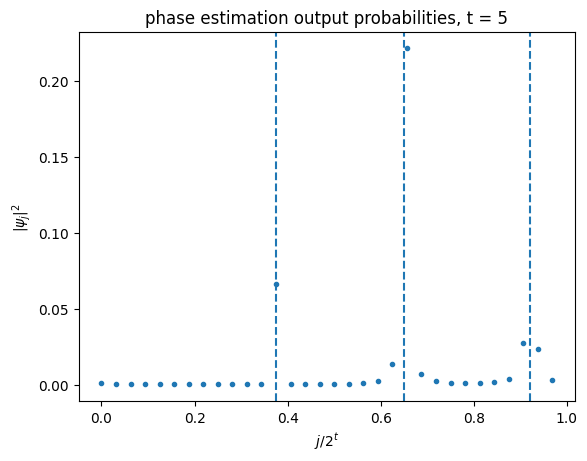

In [9]:
# visualize output (should exhibit peaks at all three phases corresponding to vectors in `w`)
plt.plot(np.arange(2**t)/2**t, abs(ψphase2)**2, '.')
for x in λ[:3]:
    plt.axvline(x, linestyle="--")
plt.xlabel(r"$j/2^t$")
plt.ylabel(r"$|\psi_j|^2$")
plt.title(f"phase estimation output probabilities, t = {t}")
plt.show()